In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt #for creating static, animated and interactive visulization
import seaborn as sns #data visulation library used for making statistical graphics

import warnings

In [3]:
#readind data
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [4]:
#size (rows,columns)
df.shape

(918, 12)

In [5]:
#viewing data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
cleaned_df = df.drop(['Sex', 'RestingECG', 'ST_Slope', 'ChestPainType', 'ExerciseAngina'], axis=1)

In [7]:
cleaned_df.sample(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
201,46,120,230,0,150,0.0,0
83,52,160,196,0,165,0.0,0
716,67,120,237,0,71,1.0,1
243,43,120,266,0,118,0.0,0
535,56,130,0,0,122,1.0,1


In [8]:
cleaned_df.shape

(918, 7)

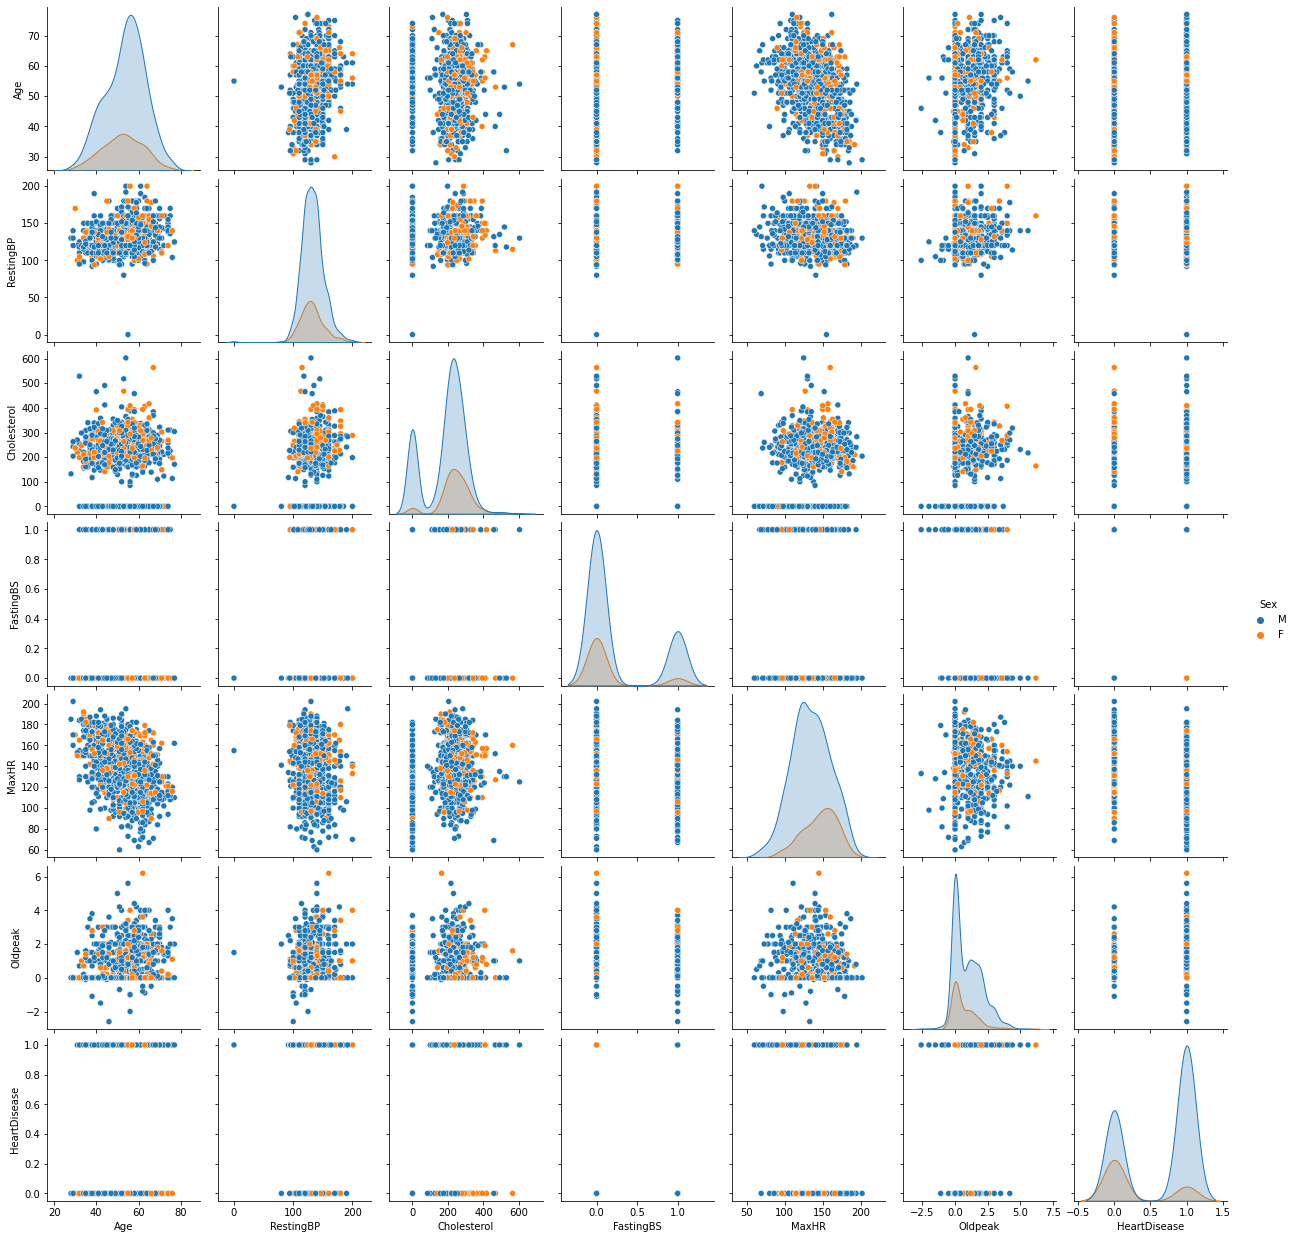

In [9]:
sns.pairplot(data=df, hue='Sex')

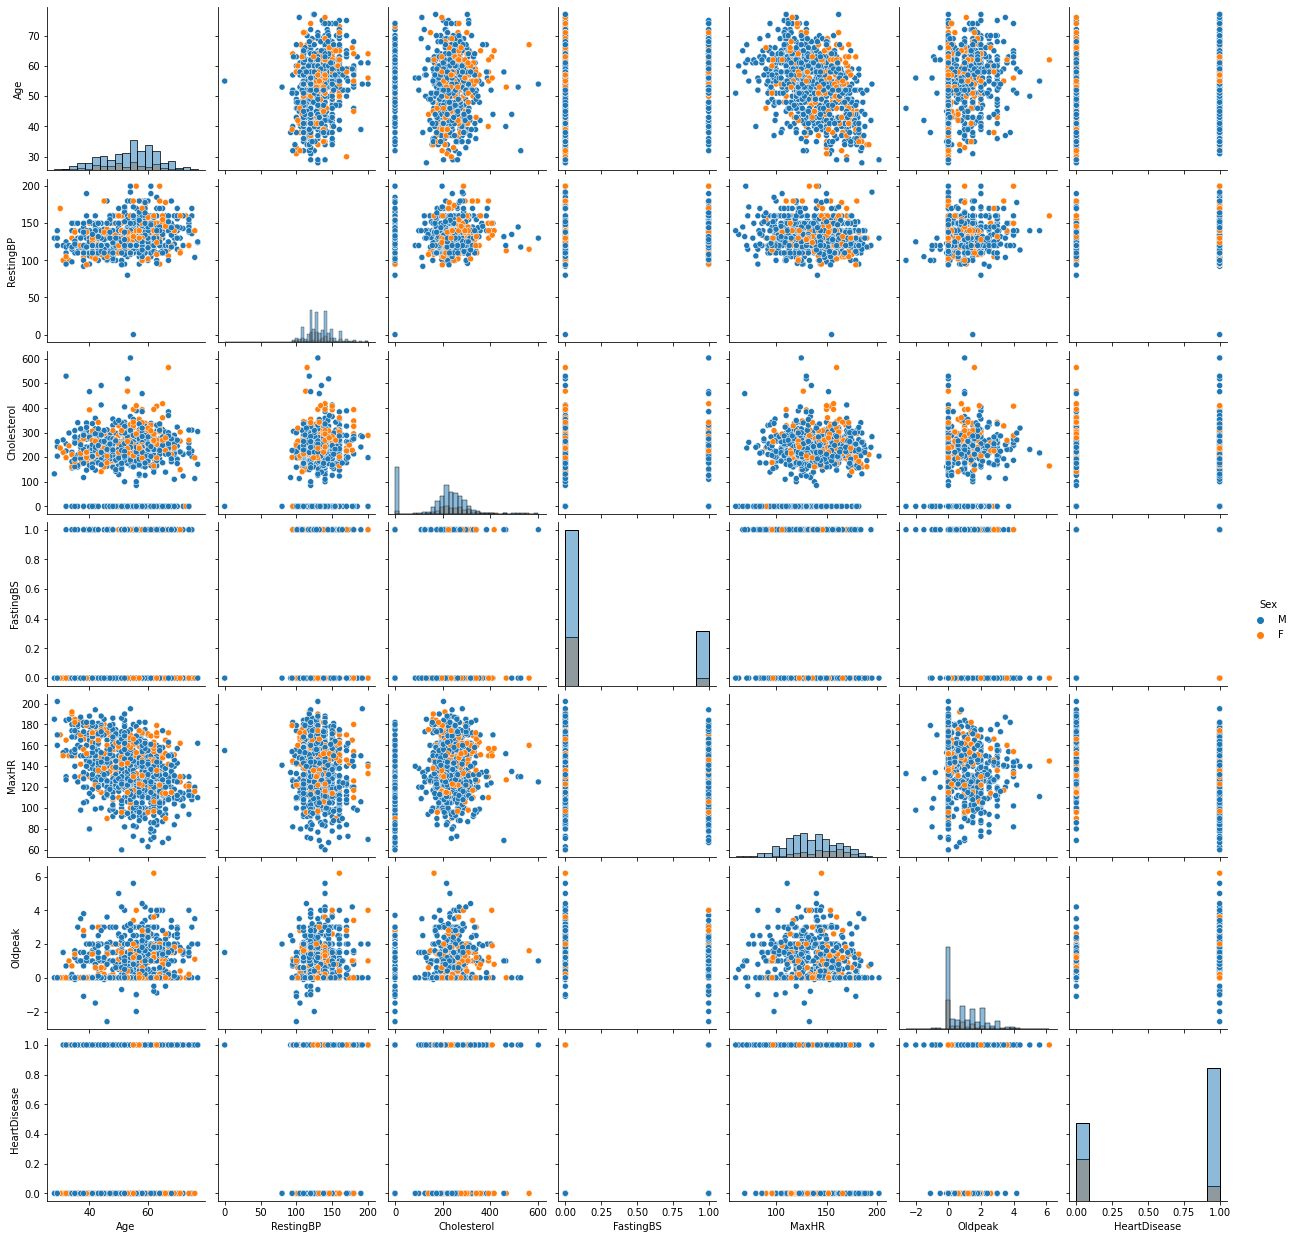

In [10]:
sns.pairplot(data=df, hue='Sex', diag_kind='hist')

In [11]:
cor = df.corr()

cor

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Text(0.5, 1.0, 'Correlation between features of Heart Dieses')

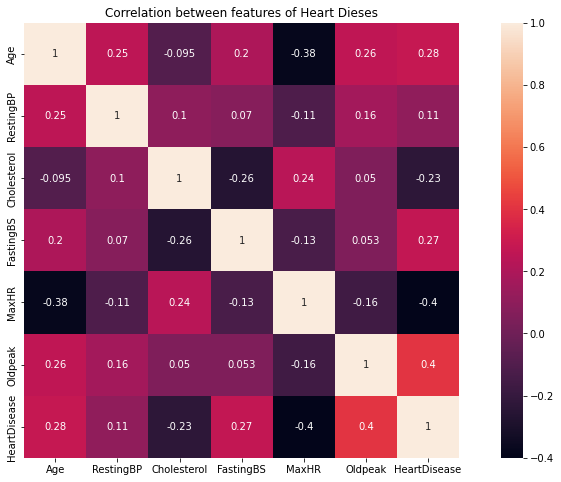

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(cor, vmax=1, square=True, annot=True)
plt.title('Correlation between features of Heart Dieses')

**Plotting Heart Rate ratio by Age**

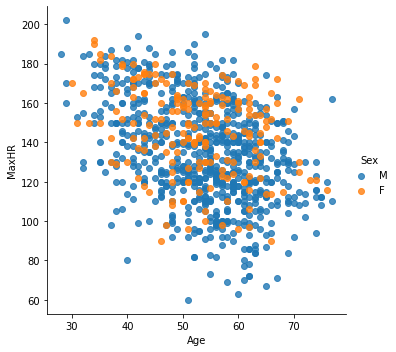

In [13]:
sns.lmplot(x='Age', y='MaxHR', data=df, hue='Sex', fit_reg=False)

In [14]:
##NORMALIZATION 

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#cleaned_df = pd.DataFrame(scaler.fit_transform(cleaned_df), columns=cleaned_df.columns, index= cleaned_df.index)


In [15]:
cleaned_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [16]:

pca = PCA(2)

out_pca = pca.fit_transform(cleaned_df[cleaned_df.columns.tolist()])

pca_df= pd.DataFrame(data=out_pca, columns=['Pca1', 'Pca2'])

print(pca_df)

          Pca1       Pca2
0    92.311151 -29.438435
1   -17.144403 -13.733615
2    81.906880  38.232108
3    13.654003  28.741565
4    -4.348124  18.104353
..         ...        ...
913  64.490425   1.443872
914  -5.472468   0.829115
915 -69.003606  17.327426
916  39.205289 -33.590990
917 -21.437176 -37.210853

[918 rows x 2 columns]


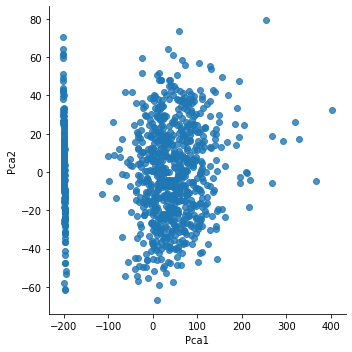

In [17]:
# total_var = pca.explained_variance_ratio_.sum() * 100
sns.lmplot(x='Pca1', y='Pca2', data=pca_df, fit_reg=False)


In [18]:
from sklearn.cluster import KMeans

def kmns_clustring(data, clusters):
    kmeans = KMeans(n_clusters =clusters,random_state=42 )
    kmeans.fit(data)
    
    kmeans.clusters = kmeans.cluster_centers_
    
    kmeans.y_kmn =  kmeans.fit_predict(out_pca)
    
    return kmeans



In [19]:
kmeans = kmns_clustring(data=pca_df, clusters=8)

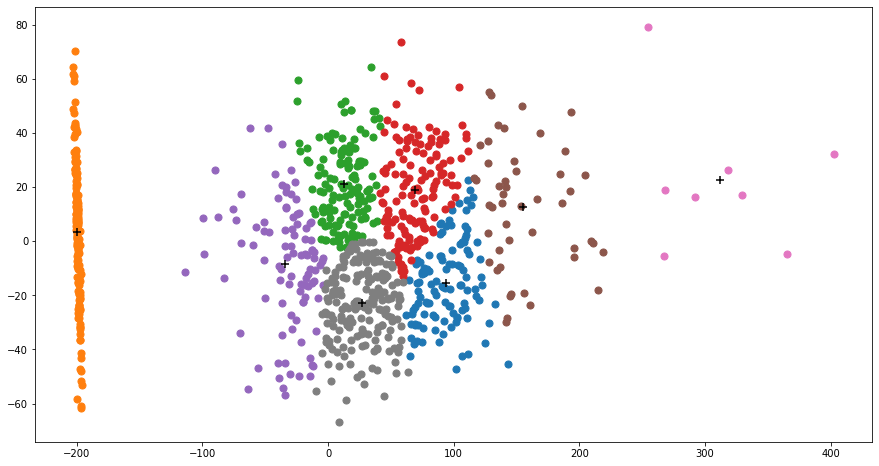

In [20]:
plt.figure(figsize=(15,8))
def scatter_plot(kmns, df):
    for i in np.unique(kmns.y_kmn):
        plt.scatter(out_pca[kmns.y_kmn == i ,0], out_pca[kmns.y_kmn == i, 1], s=50)
        plt.scatter(kmns.clusters[i][0] , kmns.clusters[i][1] , s = 80,marker='+', color = 'k')
    plt.show()
scatter_plot(kmeans, pca_df)

# Silhoutte_Score

In [21]:
from sklearn.metrics import silhouette_score
def s_score(data):
    silhouette_coefficient = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters = k, init='k-means++', n_init=30, max_iter=500, random_state=42 )
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficient.append(score)
    return silhouette_coefficient
sscore = s_score(data=pca_df)

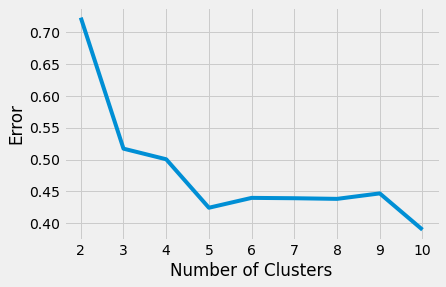

In [22]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11), sscore)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.show()

In [23]:
X=df.iloc[:,[0,2,3,4,5,6,7,8,9,10,11]]

In [24]:
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [25]:
Y=df.iloc[:,1]
Y

0      M
1      F
2      M
3      F
4      M
      ..
913    M
914    M
915    M
916    F
917    M
Name: Sex, Length: 918, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
label_x=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,41,147,0,1,98,0,10,2,0
1,21,2,55,40,0,1,82,0,20,1,1
2,9,1,31,141,0,2,25,0,10,2,0
3,20,0,39,72,0,1,34,1,25,1,1
4,26,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...
913,17,3,14,122,0,1,58,0,22,1,1
914,40,0,45,51,1,1,67,0,42,1,1
915,29,0,31,9,0,1,41,1,22,1,1
916,29,1,31,94,0,0,100,0,10,1,1


In [27]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [28]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier(random_state=1)
# fit the model
regressor.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [29]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((734, 11), (184, 11))

In [30]:

y_pred_gini = regressor.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7065


In [32]:
#plt.figure(figsize=(12,8))

#from sklearn import tree

#tree.plot_tree(regressor.fit(X_train, y_train))

In [33]:
def naive_bayes_accuracy(x, y):
    # splitting X and y into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

    # training the model on training set
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # making predictions on the testing set
    y_pred = gnb.predict(X_test)

    # comparing actual response values (y_test) with predicted response values (y_pred)
    from sklearn import metrics
    score = metrics.accuracy_score(y_test, y_pred)*100
    return score


In [34]:
print("K-Mean Accuracy: %.3f" %  (naive_bayes_accuracy(cleaned_df, kmeans.y_kmn)))

K-Mean Accuracy: 90.217
